# **Module4 Neural Network and Predictive Modeling**

# **Feature Engineering**
## Feature Engineering คือ กระบวนการสร้าง **ปรับปรุง หรือเลือก คุณลักษณะ (features) จากข้อมูล** เพื่อเพิ่มประสิทธิภาพของโมเดล ML

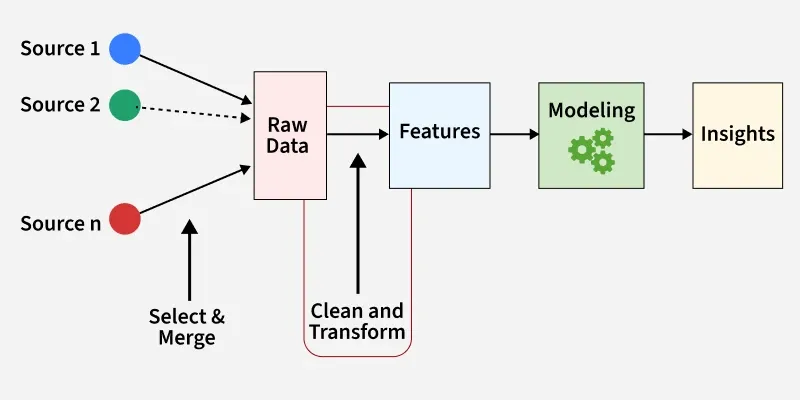

ref: https://www.geeksforgeeks.org/machine-learning/what-is-feature-engineering/



---


# **หัวข้อสำหรับการทำ Feature Engineering ในวันนี้** ✌
## **1. Feature Transformation**
## **2. Feature Selection**
## **3. Dimensionaliy Reduction**
## **4. Imbalanced Data**
## **5. Model Evaluation**
## **6. Image Convolution**

📖🤜

---

# **1. Featrue Transformation**

### **Feature Transformation คือการแปลงค่าของ features (ตัวแปร) ให้อยู่ในรูปแบบที่เหมาะสมกับการเรียนรู้ของโมเดล**

คือการปรับรูปร่างข้อมูล เพื่อให้โมเดล ML เข้าใจและเรียนรู้ได้ง่ายขึ้น เช่น
* ทำให้ข้อมูลอยู่ในสเกลใกล้เคียงกัน
* แปลงข้อมูลที่เบ้ (skewed) ให้มีการกระจายดีขึ้น
* แปลงข้อมูลเชิงหมวดหมู่ให้เป็นตัวเลขที่โมเดลเข้าใจได้

---

### 🔧 **ทำไมต้องทำ Feature Transformation**

เพราะ **โมเดลส่วนใหญ่ (เช่น Linear Regression, SVM, Neural Network) มีสมมติฐานว่า**

* ข้อมูลต้องมี ***สเกลที่ใกล้เคียงกัน***

* ไม่มีค่า outlier มากเกินไป

* ความสัมพันธ์ระหว่าง feature กับผลลัพธ์ควรเป็นเชิงเส้น (linear)

ดังนั้น การแปลงข้อมูลจึงช่วยให้:

* โมเดลเรียนรู้ได้เร็วขึ้น (gradient descent จะเสถียรกว่า)

* ลดผลกระทบของ outlier

* ทำให้ข้อมูลเหมาะกับสมมติฐานของโมเด

In [47]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import (
    MinMaxScaler,
    StandardScaler,
    Normalizer,
    OneHotEncoder,
    LabelEncoder,
    PowerTransformer,
    KBinsDiscretizer
)

## **Iris Dataset**
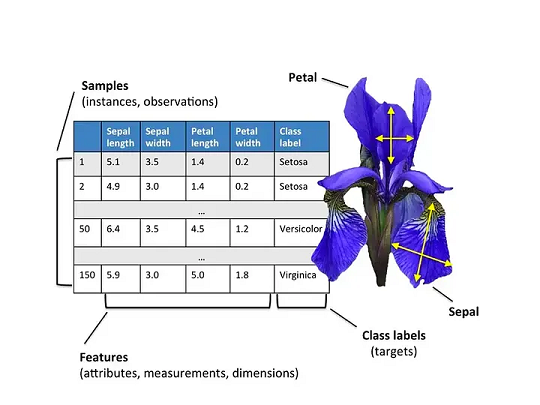

In [48]:
iris = load_iris(as_frame=True)
df = iris.frame.copy()
df['color'] = ['red', 'blue', 'green'] * 50  # Add a categorical feature

print("Original Data (first 5 rows):")
print(df.head())

Original Data (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  color  
0       0    red  
1       0   blue  
2       0  green  
3       0    red  
4       0   blue  


In [49]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,color
0,5.1,3.5,1.4,0.2,0,red
1,4.9,3.0,1.4,0.2,0,blue
2,4.7,3.2,1.3,0.2,0,green
3,4.6,3.1,1.5,0.2,0,red
4,5.0,3.6,1.4,0.2,0,blue
5,5.4,3.9,1.7,0.4,0,green
6,4.6,3.4,1.4,0.3,0,red
7,5.0,3.4,1.5,0.2,0,blue
8,4.4,2.9,1.4,0.2,0,green
9,4.9,3.1,1.5,0.1,0,red


## 1.1 Scaling: MinMax and Standardization
**MinMax:** เป็นวิธีการปรับขนาดของข้อมูลให้อยู่ในช่วงที่กำหนด

**Standardization** หรือ Z-Score Normalization เป็นเทคนิคที่ปรับขนาดข้อมูลให้มีการแจกแจงแบบปกติ (Normal Distribution) x=(x-mean)/stad..

In [50]:
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

scaled_minmax = scaler_minmax.fit_transform(df[['sepal length (cm)', 'sepal width (cm)']])
scaled_standard = scaler_standard.fit_transform(df[['sepal length (cm)', 'sepal width (cm)']])

print("MinMax Scaled (0-1 range):\n", scaled_minmax[:5], "\n")
print("Standardized (mean=0, std=1):\n", scaled_standard[:5], "\n")

MinMax Scaled (0-1 range):
 [[0.22222222 0.625     ]
 [0.16666667 0.41666667]
 [0.11111111 0.5       ]
 [0.08333333 0.45833333]
 [0.19444444 0.66666667]] 

Standardized (mean=0, std=1):
 [[-0.90068117  1.01900435]
 [-1.14301691 -0.13197948]
 [-1.38535265  0.32841405]
 [-1.50652052  0.09821729]
 [-1.02184904  1.24920112]] 



## 1.2  L2 normalization
ทำการปรับขนาดเวกเตอร์ v(ซึ่งอาจเป็นแถวของฟีเจอร์ในชุดข้อมูล หรือเวกเตอร์น้ำหนักในโมเดล) ให้เป็น v′ โดยการหารทุกองค์ประกอบของเวกเตอร์นั้นด้วย ความยาว (Length) ของเวกเตอร์เดิม ซึ่งคำนวณได้จาก L2-norm

In [51]:
normalizer = Normalizer(norm='l2')
normalized = normalizer.fit_transform(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']])
print("Normalized Feature (L2 norm=2):\n", normalized[:5], "\n")

Normalized Feature (L2 norm=2):
 [[0.80417236 0.55188299 0.2207532 ]
 [0.82860636 0.50731002 0.23674468]
 [0.80580638 0.54863413 0.22288262]
 [0.80051467 0.53947728 0.26103739]
 [0.79136117 0.56978004 0.22158113]] 



## 1.3 Encoding: Categorical -> Numeric

## Label Encode
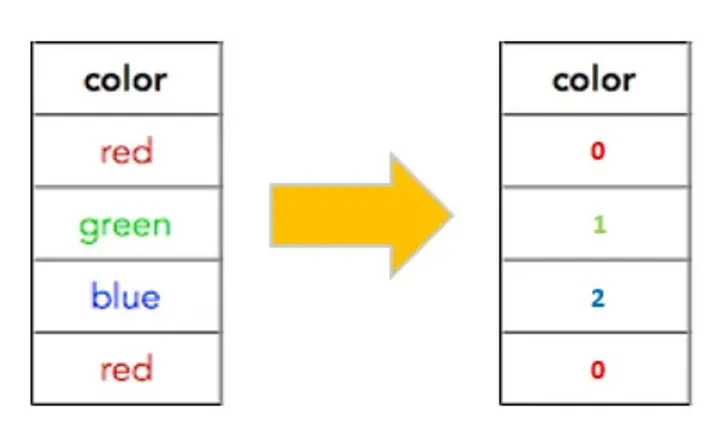

ref: https://medium.com/@sunnykumar1516/what-is-label-encoding-application-of-label-encoder-in-machine-learning-and-deep-learning-models-c593669483ed

## One-Hot Encode
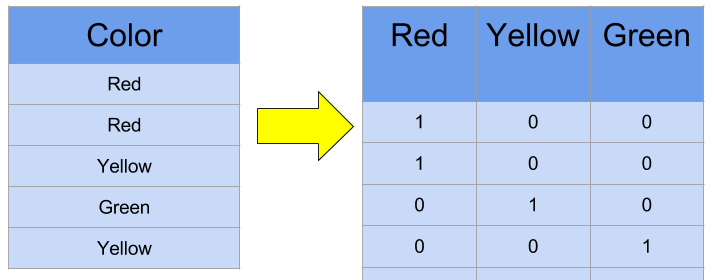

ref: https://www.kaggle.com/code/dansbecker/using-categorical-data-with-one-hot-encoding


3 สี ก็จะมี Vector ตัว

In [52]:
# --- Label Encoding ---
label_encoder = LabelEncoder()
df['color_encode'] = label_encoder.fit_transform(df['color'])
print("===Label Encoded: \n", df[['color', 'color_encode']].head(), "\n")

# --- One-Hot Encodeing ---
onehot_encoder = OneHotEncoder(sparse_output=False)
onehot = onehot_encoder.fit_transform(df[['color']])
onehot_df = pd.DataFrame(onehot, columns=onehot_encoder.get_feature_names_out(['color']))
print("===One-Hot Encoded:\n", onehot_df.head(), "\n")


===Label Encoded: 
    color  color_encode
0    red             2
1   blue             0
2  green             1
3    red             2
4   blue             0 

===One-Hot Encoded:
    color_blue  color_green  color_red
0         0.0          0.0        1.0
1         1.0          0.0        0.0
2         0.0          1.0        0.0
3         0.0          0.0        1.0
4         1.0          0.0        0.0 



## 1.4 Log / Power Transformation
ตัวอย่างการทำ Power Transformation

method:

yeo-johson (handles positive and negative data, and zeros)

box-cox (requires positive data)

In [53]:
pt = PowerTransformer(method="yeo-johnson")
transformed = pt.fit_transform(df[['petal length (cm)', 'petal width (cm)']])
print("Power Transformed (Yeo-Johnson):\n", transformed[:5])

Power Transformed (Yeo-Johnson):
 [[-1.3323059  -1.33226632]
 [-1.3323059  -1.33226632]
 [-1.38596224 -1.33226632]
 [-1.27844068 -1.33226632]
 [-1.3323059  -1.33226632]]


## 1.5 Binning
##แบ่ง sepal length เป็น 3 กลุ่ม: small medium large


In [54]:
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
binned = binner.fit_transform(df[['sepal length (cm)']])
df['sepal_length_bin'] = binned.astype(int)

print("Binned Sepal Length:\n", df[['sepal length (cm)', 'sepal_length_bin']].head(100), "\n")

Binned Sepal Length:
     sepal length (cm)  sepal_length_bin
0                 5.1                 0
1                 4.9                 0
2                 4.7                 0
3                 4.6                 0
4                 5.0                 0
..                ...               ...
95                5.7                 1
96                5.7                 1
97                6.2                 1
98                5.1                 0
99                5.7                 1

[100 rows x 2 columns] 



## 1.6 Combine transformed features

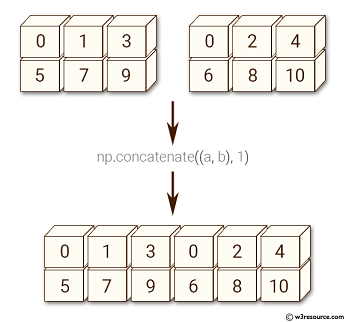

In [55]:
final_df = pd.concat([df, onehot_df], axis=1)
print("Final DataFrame with all transfromaitons ")
print(final_df)

Final DataFrame with all transfromaitons 
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1        

# **2. Feature Selection**
## คือกระบวนการเลือกเฉพาะ features ที่มีความสำคัญต่อการทำนายผลลัพธ์ (target) ***โดยตัดทิ้ง features*** **ที่ไม่เกี่ยวข้อง, ซ้ำซ้อน หรือมี noise ออกไป**

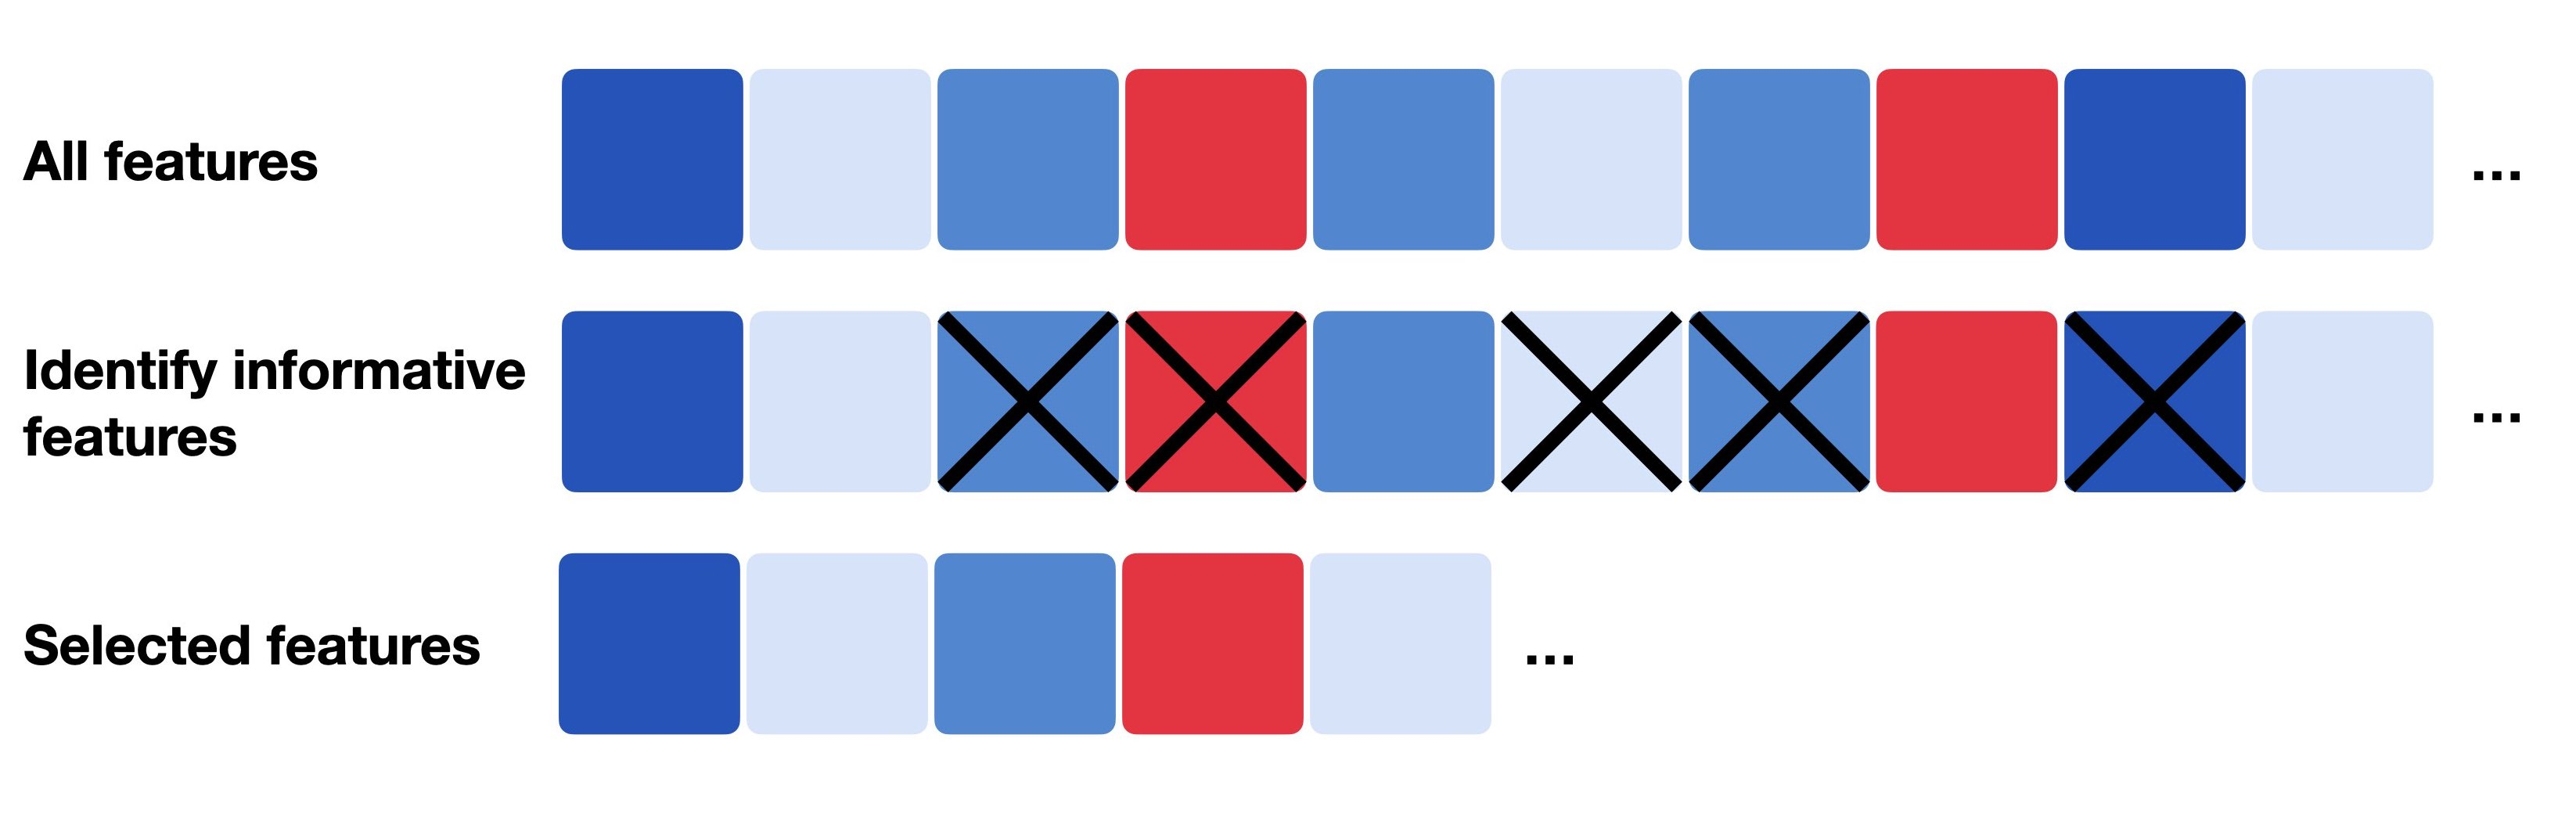

Ref:https://www.sc-best-practices.org/preprocessing_visualization/feature_selection.html
---
##Feature Selection ถึงสำคัญ

1. เพิ่มประสิทธิภาพของโมเดล
2. ลด overfitting
3. เพิ่ม interpretability เข้าใจว่า ปัจจัยใด ส่งผลต่อผลลัพธ์จริง ๆ
4. ลดเวลาในการ train  และใช้หน่วยความจำน้อยลง




#  Feature Selection Example

1️⃣ **Filter Methods**	ใช้สถิติวัดความสัมพันธ์ระหว่าง feature กับ target	Correlation, Chi-square, ANOVA

2️ **Wrapper Methods** ใช้โมเดลในการเลือก feature ที่ให้ผลดีที่สุด	Forward/Backward selection, RFE

3️⃣ **Embedded Methods**	ให้โมเดลเลือก feature ระหว่างการ train เอง	Lasso Regression, Tree-based importance



In [56]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import (SelectKBest, chi2, f_classif, RFE)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Load Dataset ⌛

In [57]:
data = load_breast_cancer()
x = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
print("Original feature count :", x.shape[1], "\n Column name:",list(x.columns[:5]), "...")

Original feature count : 30 
 Column name: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'] ...


## 2.1 Filter method
---
### 2.1.1. SelectKBest ▶ ใช้สถิติ เช่น chi-square หรือ AOVA F-test
Exp: เลือก 5 feature ที่ดีที่สุด

---

In [58]:
# Filter Methods ใช้สถิติวัดความสัมพันธ์ โดยไม่สนใจโมเดล
# วัดความสัมพันธ์ระหว่างแต่ละ feature กับ target โดยตรง เช่น คำนวณค่า Correlation, Chi-square,
# หรือ ANOVA F-test เพื่อดูว่าตัวแปรใดมีความสัมพันธ์มากที่สุดกับผลลัพธ์

selector_filter = SelectKBest(score_func=f_classif, k=5)
x_selected_filter = selector_filter.fit_transform(x, y)
selected_features_filter = x.columns[selector_filter.get_support()]

print("Filter Method (ANOVA F-test)")
print("Selected featrues:", list(selected_features_filter))

Filter Method (ANOVA F-test)
Selected featrues: ['mean perimeter', 'mean concave points', 'worst radius', 'worst perimeter', 'worst concave points']


## 2.1.2 Wrapper Method
---
### Recursive feature elimination  ▶ เป็นวิธีการที่ใช้โมเดลในการเลือก feature

---


In [59]:
# Wrapper Methods แทนที่จะดูความสัมพันธ์ทางสถิติอย่างเดียว วิธีนี้จะ “ลองเทรนโมเดลหลายรอบ” ด้วยชุด feature ที่แตกต่างกัน
# แล้วเลือกชุดที่ให้ performance ดีที่สุด (เช่น R² สูงสุด หรือ error ต่ำสุด)

# Forward Selection : เริ่มจากไม่มี feature เลย แล้วเพิ่มทีละตัวที่ช่วยให้โมเดลดีขึ้น
# Backward Elimination : เริ่มจากใช้ทุก feature แล้วค่อย ๆ ตัดตัวที่ไม่จำเป็นออก
# RFE (Recursive Feature Elimination) : ใช้โมเดล (เช่น Linear, SVM) มาค่อย ๆ ลบ feature ที่ค่าน้ำหนักน้อยที่สุดออกทีละรอบ


model_lr = LogisticRegression(max_iter=500)
selector_rfe = RFE(model_lr, n_features_to_select=5)
x_selected_rfe = selector_rfe.fit_transform(x, y)
selected_features_rfe = x.columns[selector_rfe.get_support()]

print("\n Wrapper method (RFE withd logistic Regression)")
print("Selected features:", list(selected_features_rfe))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


 Wrapper method (RFE withd logistic Regression)
Selected features: ['mean radius', 'texture error', 'worst radius', 'worst compactness', 'worst concavity']


# 2.2 Embedded Method
---

## 2.2.1 Tree-based model ▶ ใช้  feature importances จาก Tree

เป็นวิธีการเลือก feature ที่ใช้ความสำคัญจากโมเดล

---

In [60]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(x,y)
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

selected_features_embedded = x.columns[indices[:5]]

print("Embedded Model: Tree-besed importence")
print("Select feature:", list(selected_features_embedded))

Embedded Model: Tree-besed importence
Select feature: ['worst area', 'worst concave points', 'mean concave points', 'worst radius', 'worst perimeter']


## สรุป เปรียบเทียบ Feature ทีได้กทำการเลือกทั้งสามวิธี
🔉👍

---

In [61]:
summary = pd.DataFrame(
    {
        "Filter (F-test)" : list(selected_features_filter),
        "Wrapper (RFE)" : list(selected_features_rfe),
        "Embedded (RF Importacne)" : list(selected_features_embedded)
    }
)
print("Comparison of top 5 features from each mothod:")
print(summary)

Comparison of top 5 features from each mothod:
        Filter (F-test)      Wrapper (RFE) Embedded (RF Importacne)
0        mean perimeter        mean radius               worst area
1   mean concave points      texture error     worst concave points
2          worst radius       worst radius      mean concave points
3       worst perimeter  worst compactness             worst radius
4  worst concave points    worst concavity          worst perimeter



# **สรุปจุดเด่นของวิธีการแลือก feature แต่ละแบบ**
## **Filter** 👍*ข้อดี* 👌 เร็ว, ใช้ง่าย, ไม่ต้อง train model >> ❌*ข้อเสีย* 🙅  ไม่คำนึงถึงความสัมพันธ์ระหว่าง features
## **Warpper** 👍*ข้อดี* 👌 แม่นกว่า, พิจารณา interactions >> ❌*ข้อเสีย* 🙅 ช้า, ใช้เวลามาก, เสี่ยง overfitting
## **Embedded** 👍*ข้อดี* 👌 มีสมดุลระหว่างความเร็วและความแม่น >> ❌*ข้อเสีย* 🙅 ต้องใช้โมเดลที่สนับสนุน feature importance เช่น Tree

---

เลือกใช้งานตามความเหมาะสม

---

---
# **3. Dimensionaliy Reduction**
Dimensionality Reduction คือ กระบวนการ **ลดจำนวน feature (มิติ)** ของข้อมูลลง
โดยพยายาม **รักษาข้อมูลสำคัญ (important information)** ไว้ให้ได้มากที่สุด


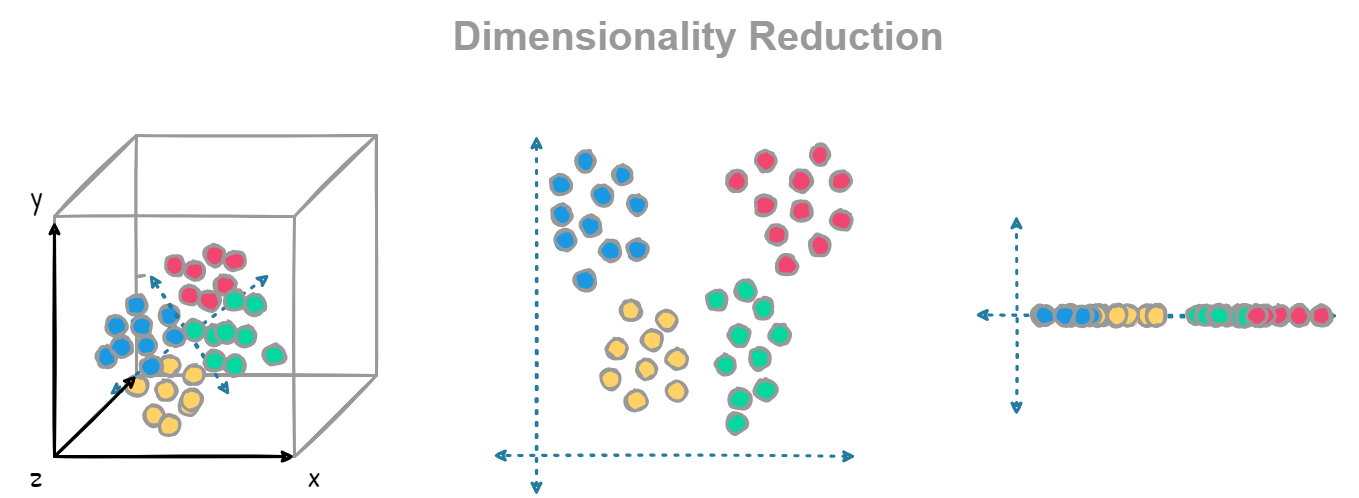

## ทำไมต้องลดมิติ ❓
เมื่อข้อมูลมี จำนวน feature เยอะมาก (เช่น หลายร้อยหรือหลายพันตัวแปร) จะเกิดปัญหา:

* **โมเดลเรียนรู้ยาก** (curse of dimensionality)
* **เวลา train นาน**, กินหน่วยความจำ
* **ข้อมูลซ้ำซ้อน** (redundant)
* **Overfitting** ง่ายเพราะโมเดลจำ noise ได้มาก

การลดมิติช่วย “ย่อข้อมูล” ให้เหลือ feature ที่สำคัญที่สุดเท่านั้น



In [62]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [63]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names = iris.feature_names

print("Iris Original shape:", y_iris.shape, "\n",  feature_names)

Iris Original shape: (150,) 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## 3.1 PCA
### Scaling data เนื้องจาก PCA ต้องใช้ข้อมูลแบบ standardized

In [64]:
iris_scaler = StandardScaler().fit_transform(X_iris)
print("shape: ", iris_scaler.shape)

shape:  (150, 4)


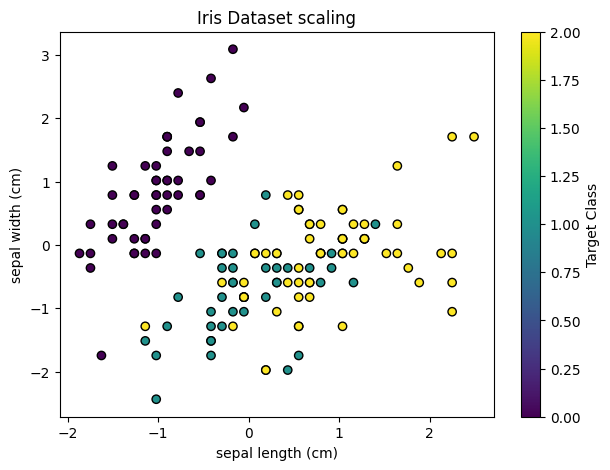

In [65]:
plt.figure(figsize=(7,5))
plt.scatter(iris_scaler[:,0], iris_scaler[:,1], c=y_iris, cmap='viridis', edgecolor='k')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Iris Dataset scaling')
plt.colorbar(label='Target Class')
plt.show()

## Apply PCA ลดมิติจาก 4 ▶ 2 มิติ

In [66]:
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaler)

print("Transformed shape:", iris_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)

Transformed shape: (150, 2)
Explained variance ratio: [0.72962445 0.22850762]


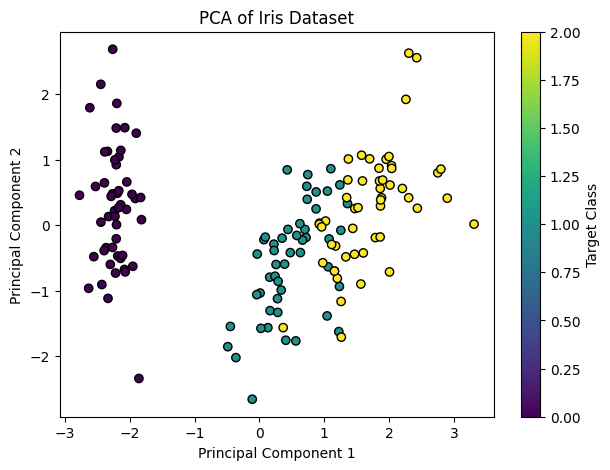

In [67]:
plt.figure(figsize=(7,5))
plt.scatter(iris_pca[:,0], iris_pca[:,1], c=y_iris, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar(label='Target Class')
plt.show()

## 3.2 t-SNE (t-distributed Stochastic Neighbor Embedding)
เป็นวิธีการทำ Dimensionality Reduction แบบ None-linear
> t-SNE จะ จัดกลุ่มข้อมูลที่คล้ายกันให้อยู่ใกล้กัน

> ใช้สำหรับ visualization ของข้อมูลหลายมิติใน 2D หรือ 3D

> เหมาะกับการสำรวจข้อมูล (data exploration)

> ไม่เหมาะกับการนำไปใช้ในการทำนาย (เพราะไม่สามารถ invert กลับได้)

In [68]:
from sklearn.manifold import TSNE

In [69]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(iris_scaler)

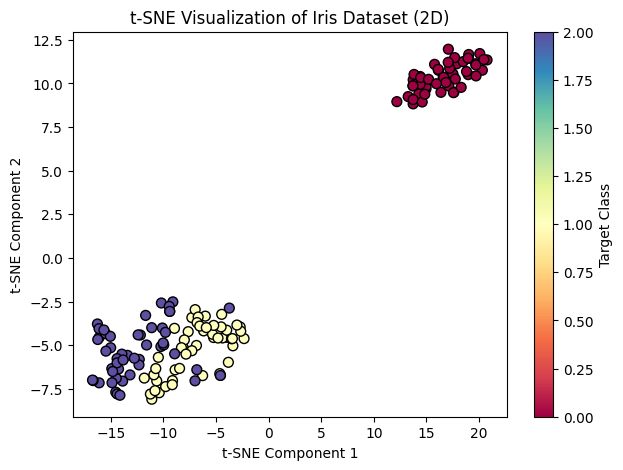

In [70]:
plt.figure(figsize=(7,5))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_iris, cmap='Spectral', edgecolor='k', s=50)
plt.title('t-SNE Visualization of Iris Dataset (2D)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Target Class')
plt.show()

# **4. Imbalanced Data**
Imbalanced Dataset คือ ข้อมูลที่ “**สัดส่วนของแต่ละ class ไม่เท่ากัน**”

เช่น Class 0 = 95%, Class 1 = 5% → โมเดลจะเรียนรู้ให้ทำนาย Class 0 เกือบตลอดเวลา
เพราะ **accuracy สูง ถึง 95%** แต่จริง ๆ แล้ว **performance แย่** สำหรับ class ที่น้อยกว่าโมเดลจะทำนายไม่ถูก

**ตัวอย่างปัญหา**
เช่น การตรวจโรค, การทุจริต, การตรวจ defect ในภาพ

Normal class (negative) มีเยอะ

Abnormal class (positive) มีน้อยมาก

ถ้าโมเดลเดาว่า “ทุกอันคือปกติ” → Accuracy = สูง
แต่ Recall ของ class abnormal = 0 ❌

**ผลลัพธ์ที่ดีควรดูจาก F1-score, Recall, AUC (ไม่ใช่ Accuracy อย่างเดียว)**

## 4.1 SMOTE (Synthetic Minority Oversampling Technique)

ทคนิคนี้ **สร้างข้อมูลใหม่ของฝั่ง class ที่มีข้อมูลน้อย** โดยการ interpolate ระหว่างเพื่อนบ้านใกล้เคียง

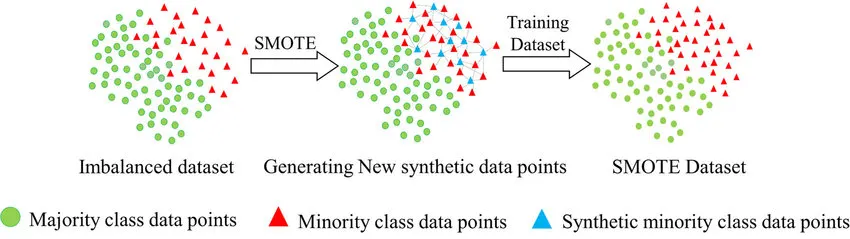

ref: https://pub.aimind.so/synthetic-minority-over-sampling-technique-smote-empowering-ai-through-imbalanced-data-handling-d86f4de32ea3

In [71]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt

### สร้างข้อมูลจำลอง (imbalanced)

In [72]:
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    weights=[0.9, 0.1],
    random_state=42
)

In [73]:
print("Before SMOTE:", Counter(y))

Before SMOTE: Counter({np.int64(0): 447, np.int64(1): 53})


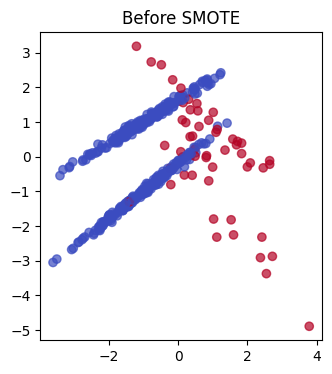

In [74]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Before SMOTE")
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.show()

In [75]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [76]:
print("After SMOTE:", Counter(y_resampled))

After SMOTE: Counter({np.int64(0): 447, np.int64(1): 447})


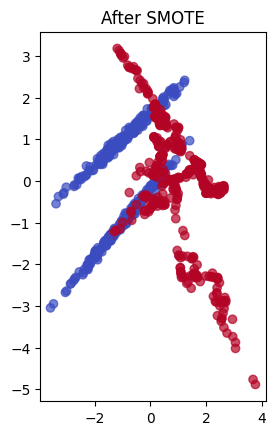

ก่อน SOMTE -> class 0 มากกว่า class 1 มาก
หลัง SMOTE -> ทั้งสอง class มีจำนวนใกล้เคียงกัน


In [77]:
plt.subplot(1,2,2)
plt.title("After SMOTE")
plt.scatter(X_resampled[:,0], X_resampled[:,1], c=y_resampled, cmap='coolwarm', alpha=0.7)
plt.show()

print("ก่อน SOMTE -> class 0 มากกว่า class 1 มาก")
print("หลัง SMOTE -> ทั้งสอง class มีจำนวนใกล้เคียงกัน")

## 4.2 Class Weight ในโมเดลโดยตรง

ไม่ต้องเปลี่ยนข้อมูล แต่ให้ “**เพิ่มความสำคัญ**” ให้ class ที่น้อยกว่า
โดยใช้ parameter class_weight='balanced'

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## โมเดลปกติ (ไม่ใช้ class weight)

In [80]:
model_normal = LogisticRegression()
model_normal.fit(X_train, y_train)
y_pred_normal = model_normal.predict(X_test)

print("Without class_weight:")
print(classification_report(y_test, y_pred_normal))

Without class_weight:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       138
           1       1.00      0.50      0.67        12

    accuracy                           0.96       150
   macro avg       0.98      0.75      0.82       150
weighted avg       0.96      0.96      0.95       150



## โมเดลที่ใช้ class_weight='balanced'

In [81]:
model_weighted = LogisticRegression(class_weight='balanced')
model_weighted.fit(X_train, y_train)
y_pred_weighted = model_weighted.predict(X_test)

print("\nWith class_weight='balanced':")
print(classification_report(y_test, y_pred_weighted))
print("โมเดลที่ใช้ class_weight=balanced → มี recall ของ minority class ดีขึ้น \n Accuracy อาจลดลงเล็กน้อย แต่โมเดลยุติธรรมมากขึ้น")


With class_weight='balanced':
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       138
           1       0.27      0.75      0.40        12

    accuracy                           0.82       150
   macro avg       0.62      0.79      0.65       150
weighted avg       0.92      0.82      0.85       150

โมเดลที่ใช้ class_weight=balanced → มี recall ของ minority class ดีขึ้น 
 Accuracy อาจลดลงเล็กน้อย แต่โมเดลยุติธรรมมากขึ้น


# **5.Model Evaluation**
## Evaluation คือเครื่องมือในการบอกว่า Feature Engineering ของเรามีคุณภาพแค่ไหน

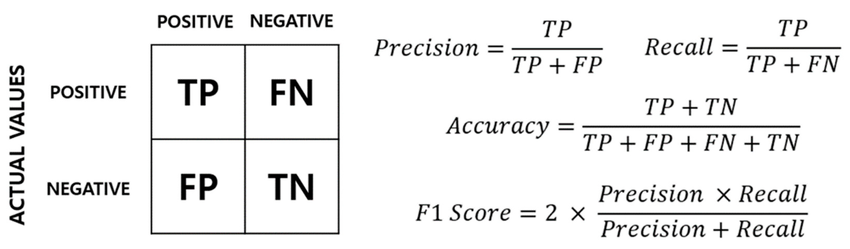

ref: https://www.v7labs.com/blog/f1-score-guide

---

##1. เริ่มจาก ข้อมูลดิบ (Raw Data)
## 2. ทำ Feature Engineering เช่น
> *  ### Scaling, Encoding  
> *  ### Feature Selection
> *  ### Dimensionality Reduction
> *  ### สร้าง Feature ใหม่ (Feature Creation)

## 3. นำข้อมูลที่แปลงแล้วไป Train โมเดล
## 4. ทำ Evaluation (Cross-validation, Metrics)
## 5. ดูผลลัพธ์ แล้ว ย้อนกลับมาปรับ Feature Engineering ถ้ายังไม่ดี

## ***Evaluation จะเป็นเหมือน “กระจกสะท้อน” คุณภาพของ Feature Engineering***





---
### 📊 ตัวอย่าง สมมติเรามีข้อมูลจะทำนายว่า *ลูกค้าจะซื้อสินค้าหรือไม่* มี feature
### เช่น age, income, region, purchased_before

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

data = fetch_openml("adult", version=2, as_frame=True)
X = data.data.sample(2000, random_state=42)
y = (data.target.sample(2000, random_state=42) == ">50K").astype(int)


### แบ่ง feature เป็น numeric และ categorical

In [83]:
num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns

### สร้าง Feature Engineering pipeline

In [84]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),       # Scaling สำหรับตัวเลข
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)  # Encoding สำหรับตัวอักษร
    ]
)

### สร้างโมเดลรวมกับ pipeline

In [85]:
model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", LogisticRegression(max_iter=500))
])

### Evaluate ด้วย Cross-validation

In [86]:
scores = cross_val_score(model, X, y, cv=5, scoring="f1")

print("F1-score per fold:", np.round(scores, 3))
print("Mean F1-score:", np.mean(scores))

F1-score per fold: [0.435 0.523 0.484 0.566 0.514]
Mean F1-score: 0.5043258773944143


* ถ้า F1-score ต่ำ → แสดงว่า feature ปัจจุบันอาจยังไม่ดีพอ
→ อาจต้องลอง **เพิ่ม Feature ใหม่, ลด noise, หรือ ทำ Transformation อื่น ๆ**

* ถ้า F1-score สูงและเสถียรในทุก fold → หมายความว่า Feature Engineering ปัจจุบัน **มีประสิทธิภาพดี**

---
## ตัวอย่างการเปลี่ยน Feature แล้วประเมินใหม่
เช่น ถ้าเราเพิ่ม Polynomial Feature หรือ PCA แล้วนำไป Evaluate อีกครั้ง

### เพิ่ม Polynomial feature แล้ว Evaluate

In [87]:
poly_model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2),
    LogisticRegression(max_iter=500)
)
poly_scores = cross_val_score(
    poly_model,
    X.select_dtypes("number"), y,
    cv=5, scoring="f1"
)
print("With Polynomial Features: Mean F1 =", np.mean(poly_scores))


With Polynomial Features: Mean F1 = 0.5432979305215705


### ใช้ PCA ลดมิติ แล้ว Evaluate

In [88]:
pca_model = make_pipeline(
    StandardScaler(),
    PCA(n_components=5),
    LogisticRegression(max_iter=500)
)
pca_scores = cross_val_score(
    pca_model,
    X.select_dtypes("number"), y,
    cv=5, scoring="f1"
)
print("With PCA: Mean F1 =", np.mean(pca_scores))

With PCA: Mean F1 = 0.4997174903999305


# 📈 ผลลัพธ์ของ F1-score จะช่วยให้เรารู้ว่า **“Feature แบบไหนเหมาะกับข้อมูลของเรามากที่สุด”**

# **6. Image Convolution**
Image Convolution เป็นวิธีการสำคัญของการประมวลผลภาพ (Image Processing) และโครงข่ายประสาทเทียมแบบคอนโวลูชัน (Convolutional Neural Networks หรือ CNNs) ที่ใช้ใน Deep Learning

เป็นการดำเนินการทางคณิตศาสตร์ ที่ใช้เลื่อน ตัวกรองขนาดเล็ก หรือเรียกว่า Kernel หรือ Filter ไปทั่วทั้งภาพ เพื่อสร้างภาพใหม่ที่แสดงผลลัพธ์ของการดำเนินการนั้น ๆ


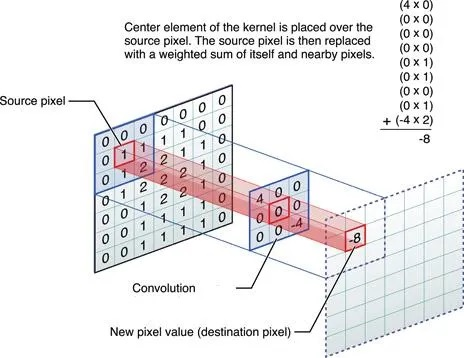

Ref: https://medium.com/@bdhuma/6-basic-things-to-know-about-convolution-daef5e1bc411


cv2.imread() → อ่านภาพ

kernel → ตัวกรอง (3x3)

cv2.filter2D() → คำนวณ convolution ระหว่างภาพกับ kernel

In [89]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Module4 Neural Network and Prediction Modeling/tiger.jpg')

# Check if the image was loaded successfully
if img is None:
    print("Error: Image not found or could not be loaded.")
else:
    kernel = np.array([ [ -1, -1, -1],
                        [ -1,  8, -1],
                        [ -1, -1, -1]])

    result = cv2.filter2D(img,-1,kernel)

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(img, cmap='gray')
    plt.title('Original')

    plt.subplot(1,2,2)
    plt.imshow(result, cmap='gray')
    plt.title("After Convolution")
    plt.show()

# Thank You 🙏